In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
data_dir = 'dataset'

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.3,
                                                    subset='training',
                                                    image_size=(224,224),
                                                    shuffle=True,
                                                    seed=123,
                                                    batch_size=32)

Found 1491 files belonging to 8 classes.
Using 1044 files for training.


In [7]:
class_labels=train_ds.class_names
class_labels

['bohochic',
 'business',
 'darkacademia',
 'desi',
 'elegant',
 'grunge',
 'minimalist',
 'streetwear']

In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.3,
                                                    subset='validation',
                                                    image_size=(224,224),
                                                    shuffle=True,
                                                    seed=123,
                                                    batch_size=32)

Found 1491 files belonging to 8 classes.
Using 447 files for validation.


In [5]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
# model = VGG16(include_top=False, input_shape=(224,224,3))
model=tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    pooling="avg"
)
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(8, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=opt , metrics=['accuracy'])

In [8]:
# Set callback functions to early stop training 
# mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
hist = model.fit(train_ds,validation_data=val_ds, epochs=20 )

Epoch 1/20


33/33 [==============================] - 94s 3s/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 1.2115 - val_accuracy: 0.6622
Epoch 2/20
33/33 [==============================] - 91s 3s/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 1.3176 - val_accuracy: 0.6667
Epoch 3/20
33/33 [==============================] - 88s 3s/step - loss: 0.0141 - accuracy: 0.9933 - val_loss: 1.2977 - val_accuracy: 0.6801
Epoch 4/20
33/33 [==============================] - 94s 3s/step - loss: 0.0128 - accuracy: 0.9943 - val_loss: 1.2712 - val_accuracy: 0.7025
Epoch 5/20
33/33 [==============================] - 84s 3s/step - loss: 0.0110 - accuracy: 0.9952 - val_loss: 1.2860 - val_accuracy: 0.6711
Epoch 6/20
33/33 [==============================] - 84s 3s/step - loss: 0.0125 - accuracy: 0.9923 - val_loss: 1.2893 - val_accuracy: 0.6667
Epoch 7/20
33/33 [==============================] - 84s 3s/step - loss: 0.0116 - accuracy: 0.9923 - val_loss: 1.2691 - val_accuracy: 0.6823
Epoch 8/20
33/33 [=============

In [9]:
model.save_weights("fashionstyle8mobilenetv1_67.h5")

In [15]:
from PIL import Image
# Function to preprocess an image for prediction
def preprocess_image(image_path):
    image = Image.open(image_path)
    # Preprocess the image as needed, e.g., resize, normalize, and convert to NumPy array
    image = image.resize((224, 224))  # Example: Resize the image to match your model's input shape
    
    return image

In [35]:
test_dir='test'

In [36]:
import os
import numpy as np
file_names = []
predictions = []
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        file_path = os.path.join(test_dir, filename)
        # Preprocess the image
        processed_image = preprocess_image(file_path)
        # Expand dimensions to match the input shape expected by the model
        processed_image = np.expand_dims(processed_image, axis=0)
        # Make predictions using the model
        prediction = model.predict(processed_image)
        # Store the file name and prediction
        file_names.append(filename)
        predictions.append(prediction[0])  

1/1 [==============================] - 0s 46ms/step


In [37]:
file_names,predictions

(['49f7481952681610b7a4a8e1e2aa8e5b.jpg',
  '694901b813b6c1c148088328d294f754.jpg',
  '7afef5e9709418d804d215d2545c3f99.jpg',
  'Black-Flower-Design-Lehenga-Le-1651231661.jpeg',
  'download.jpeg',
  'rtnvy5niti5i70470.jpg'],
 [array([3.6339912e-10, 4.3355069e-08, 2.3050828e-09, 2.1395061e-10,
         7.5106019e-11, 5.4462244e-09, 1.4530442e-08, 1.0000000e+00],
        dtype=float32),
  array([6.1475221e-05, 5.4293359e-05, 9.5317215e-03, 5.1701363e-07,
         5.1538365e-05, 9.8039001e-01, 8.0302812e-04, 9.1073625e-03],
        dtype=float32),
  array([0.01477896, 0.08952449, 0.55665386, 0.00275655, 0.27851778,
         0.00177788, 0.05295841, 0.00303207], dtype=float32),
  array([1.2185299e-03, 1.8174995e-05, 1.6989421e-06, 9.8537236e-01,
         6.5822774e-03, 6.7464057e-03, 4.7129647e-06, 5.5748766e-05],
        dtype=float32),
  array([1.0478443e-02, 5.4405630e-04, 9.0003999e-07, 5.8360487e-01,
         4.0504006e-01, 2.1330314e-04, 7.9909565e-05, 3.8465772e-05],
        dtype=fl

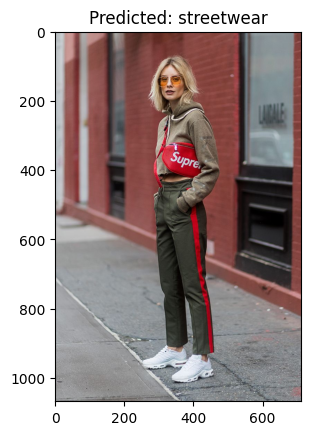

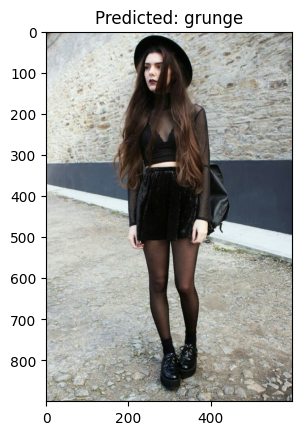

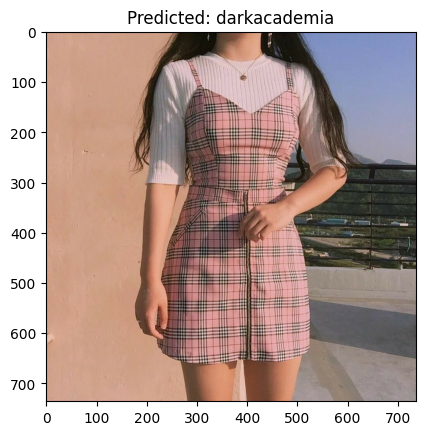

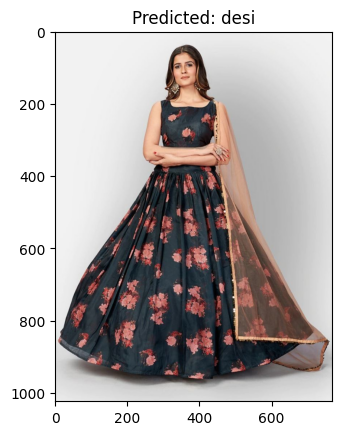

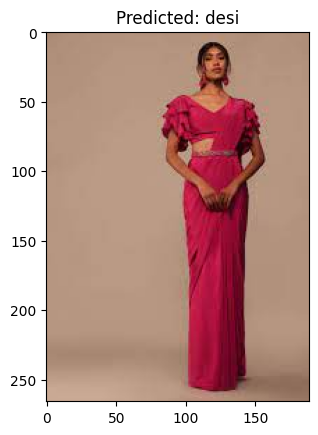

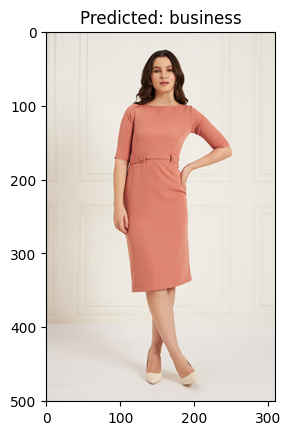

In [38]:
import matplotlib.pyplot as plt
for i in range(len(file_names)):
    plt.figure()
    img_path='test/'+file_names[i]
    img=plt.imread(img_path)
    plt.imshow(img.astype("uint8"))  # Display the image
    predicted_class = np.argmax(predictions[i])
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.show()

NameError: name 'class_names' is not defined

streetwear: 100.00%


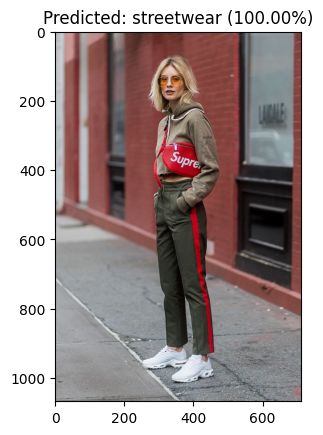

darkacademia: 0.95%
grunge: 98.04%
streetwear: 0.91%


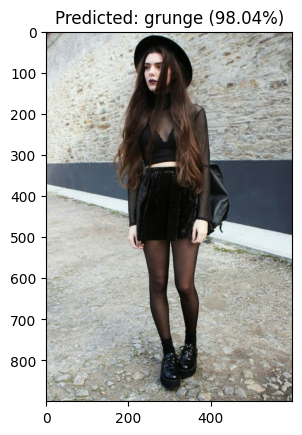

bohochic: 1.48%
business: 8.95%
darkacademia: 55.67%
elegant: 27.85%
minimalist: 5.30%


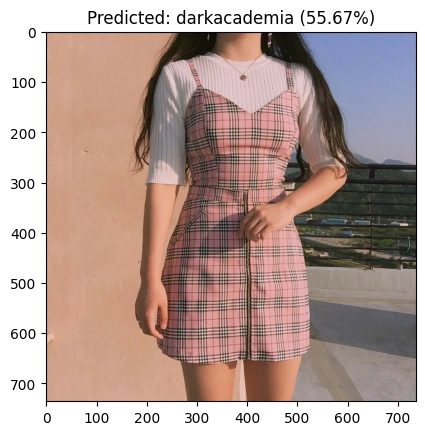

desi: 98.54%
elegant: 0.66%
grunge: 0.67%


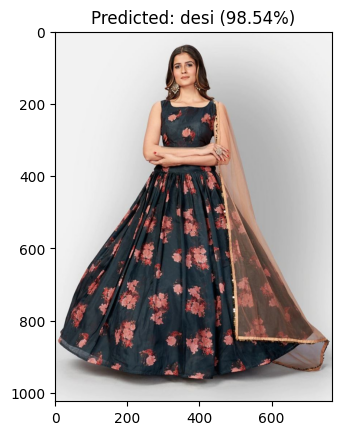

bohochic: 1.05%
desi: 58.36%
elegant: 40.50%


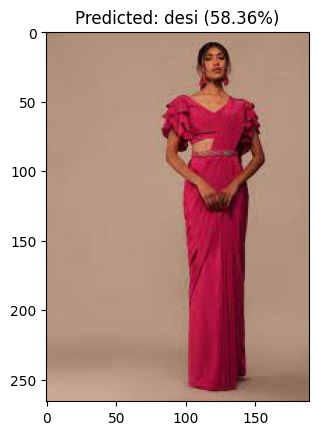

business: 73.69%
elegant: 26.24%


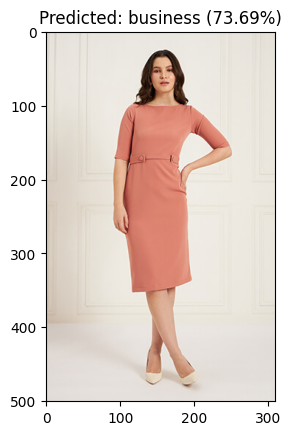

In [39]:
# Display the images along with the predicted class labels and percentages
for i in range(len(file_names)):
    plt.figure()
    img_path='test/'+file_names[i]
    img=plt.imread(img_path)
    plt.imshow(img.astype("uint8"))  # Display the image

    predicted_class = np.argmax(predictions[i])
    predicted_percentage = predictions[i][predicted_class] * 100
    plt.title(f'Predicted: {class_labels[predicted_class]} ({predicted_percentage:.2f}%)')

    # Display only labels with percentage above 0
    for j in range(len(class_labels)):
        percentage = predictions[i][j] * 100
        if round(percentage) > 0.00:
            print(f'{class_labels[j]}: {percentage:.2f}%')

    plt.show()

In [2]:
# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.models import load_model

In [3]:
# base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
# ])
